# Computational Statistics TP1

## Exercise 3 : Stochastic Gradient Learning in Neural Networks

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import csv
from tqdm import tqdm

### Question 1

Voici l'implémentation de l'algorithme du gradient stochastique.

In [36]:
def gradient_sto(epsilon, w0, x, y, N):
    w = w0
    for k in range(N):
        i = randint(0,len(y)-1)
        w_non_normalise = w + 2*epsilon[k]*(y[i] - np.matmul(np.transpose(w),x[i]))*x[i]
        w = w_non_normalise/np.linalg.norm(w_non_normalise)
    return w

### Question 2

On commence par choisir aléatoirement le vecteur normal $w$ à l'hyperplan séparateur. Puis on tire uniformément des points $z_i$ dans le carré $[-1,1]^2$ et on leur assigne le label $-1$ ou $1$ en fonction de quel côté de l'hyperplan le point est.  

In [37]:
n = 1000
theta = 2*np.pi*np.random.uniform() 
w = np.array([np.cos(theta),np.sin(theta)])
x = 2*np.random.uniform(size=(n,2))-1
y = np.zeros(n)
for i in range(n):
    y[i] = np.sign(np.dot(w,x[i]))

On trace l'hyperplan séparateur ainsi que le vecteur normal $w$. On trace aussi les points tirés précédement.

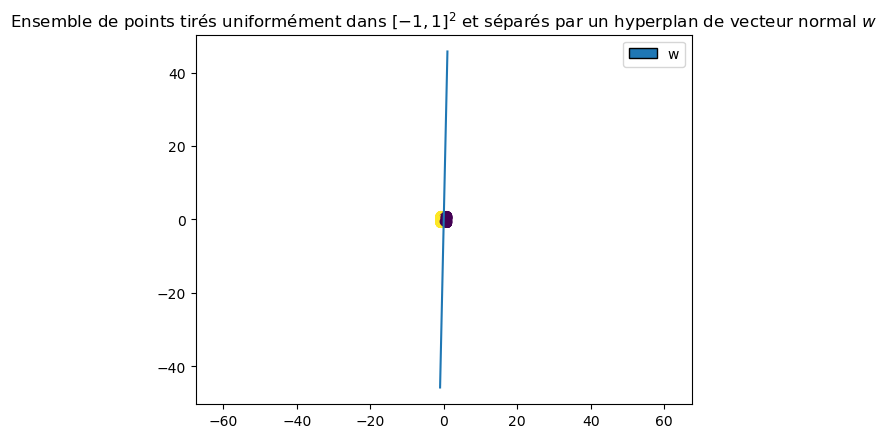

In [38]:
plt.arrow(0,0,w[0],w[1],length_includes_head=True,head_length=0.1,head_width=0.1,label="w")
plt.plot(np.linspace(-1,1,100),[-w[0]/w[1]*i for i in np.linspace(-1,1,100)])
plt.scatter(x[:,0],x[:,1],c = y)
plt.axis("equal")
plt.legend()
plt.title("Ensemble de points tirés uniformément dans $[-1,1]^2$ et séparés par un hyperplan de vecteur normal $w$")
plt.show()

### Question 3

On fait tourner l'algorithme du gradient stochastique sur notre ensemble de points. On part d'un point quelconque dans $\mathcal{U}_c$.

In [39]:
N = 10000
w0 = np.random.rand(2)
w_learned = gradient_sto([1/n for n in range(1,N+1)],w0,x,y,N)

On trace l'hyperplan apprit $w^*$ ainsi que les points toujours colorié selon la séparation originale. 

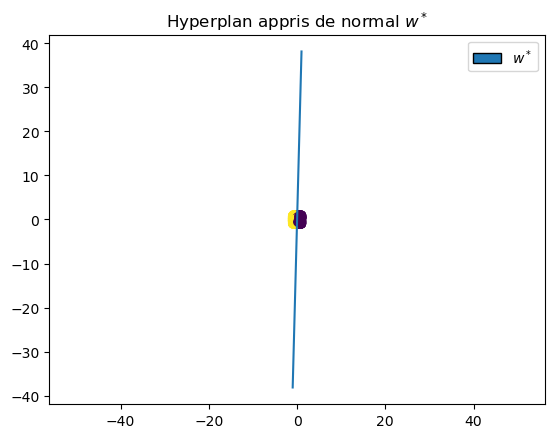

In [40]:
plt.plot(np.linspace(-1,1,100),[-w_learned[0]/w_learned[1]*i for i in np.linspace(-1,1,100)])
plt.arrow(0,0,w_learned[0],w_learned[1],length_includes_head=True,head_length=0.1,head_width=0.1,label="$w^*$")
plt.axis("equal")
plt.legend()
plt.scatter(x[:,0],x[:,1],c = y)
plt.title("Hyperplan appris de normal $w^*$")
plt.show()

On regarde combien d'erreurs sont faites par l'hyperplan appris. 

In [41]:
erreurs = 0
for i in range(n):
    if np.sign(np.dot(w_learned,x[i])) != y[i]:
        erreurs += 1
print("Nombre d'erreurs de classification : " + str(erreurs))
print("Pourcentage d'erreur : " + str(erreurs/n*100) + "%")

Nombre d'erreurs de classification : 1
Pourcentage d'erreur : 0.1%


On reitère l'experience un grand nombre de fois pour déduire une moyenne de l'erreur commise par l'algorithme. 

In [42]:
moyenne = 0
N = 1000
for i in tqdm(range(N)):
    n = 1000
    theta = 2*np.pi*np.random.uniform() 
    w = np.array([np.cos(theta),np.sin(theta)])
    x = 2*np.random.uniform(size=(n,2))-1
    y = np.zeros(n)
    for i in range(n):
        y[i] = np.sign(np.dot(w,x[i]))

    w0 = np.random.rand(2)
    w_learned = gradient_sto([1/n for n in range(1,N+1)],w0,x,y,N)

    erreurs = 0
    for i in range(n):
        if np.sign(np.dot(w_learned,x[i])) != y[i]:
            erreurs += 1
    moyenne += erreurs
print("L'erreur moyenne est de "+ str(moyenne/N/n*100) + ("%"))

100%|███████████████████████████████████████| 1000/1000 [00:11<00:00, 89.86it/s]

L'erreur moyenne est de 2.3019%


### Question 4

On ajoute un bruit gaussien à nos données.

In [43]:
n = 100
theta = 2*np.pi*np.random.uniform() 
w = np.array([np.cos(theta),np.sin(theta)])
x = 2*np.random.uniform(size=(n,2))-1
y = np.zeros(n)
for i in range(n):
    y[i] = np.sign(np.dot(w,x[i]))
    
#Ajout du bruit gaussien
x += np.random.normal(loc = [0,0],scale = 0.3, size = x.shape)

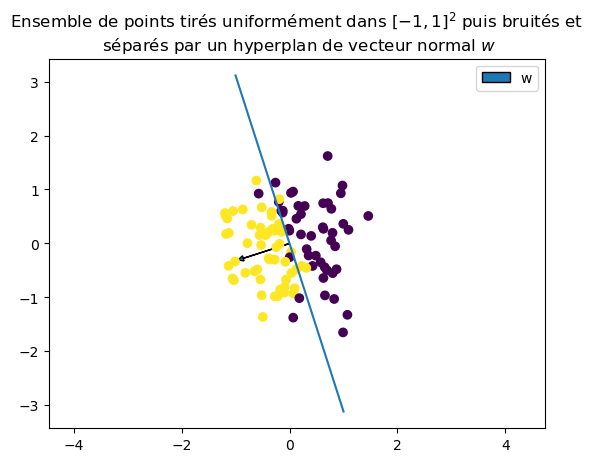

In [44]:
plt.arrow(0,0,w[0],w[1],length_includes_head=True,head_length=0.1,head_width=0.1,label="w")
plt.plot(np.linspace(-1,1,100),[-w[0]/w[1]*i for i in np.linspace(-1,1,100)])
plt.scatter(x[:,0],x[:,1],c = y)
plt.axis("equal")
plt.legend()
plt.title("Ensemble de points tirés uniformément dans $[-1,1]^2$ puis bruités et \n séparés par un hyperplan de vecteur normal $w$")
plt.show()

In [45]:
N = 10000
w_learned = gradient_sto([1/n for n in range(1,N+1)],[0.5,0.5],x,y,N)

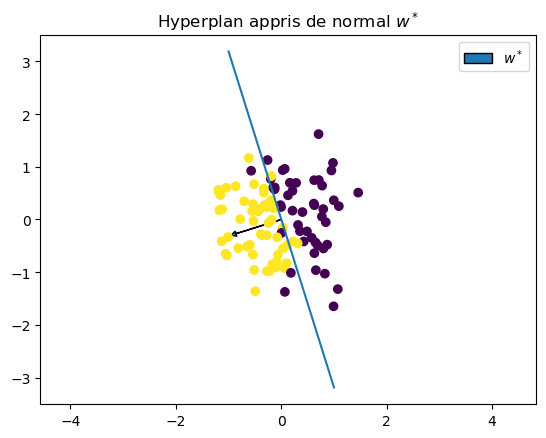

In [46]:
plt.plot(np.linspace(-1,1,100),[-w_learned[0]/w_learned[1]*i for i in np.linspace(-1,1,100)])
plt.arrow(0,0,w_learned[0],w_learned[1],length_includes_head=True,head_length=0.1,head_width=0.1,label="$w^*$")
plt.axis("equal")
plt.legend()
plt.scatter(x[:,0],x[:,1],c = y)
plt.title("Hyperplan appris de normal $w^*$")
plt.show()

In [47]:
erreurs = 0
for i in range(n):
    if np.sign(np.dot(w_learned,x[i])) != y[i]:
        erreurs += 1
print("Nombre d'erreurs de classification : " + str(erreurs))
print("Pourcentage d'erreur : " + str(erreurs/n*100) + "%")

Nombre d'erreurs de classification : 7
Pourcentage d'erreur : 7.000000000000001%


On fait comme pour la question 3, on veut avoir une moyenne de l'erreur.

In [48]:
moyenne = 0
N = 1000
for i in tqdm(range(N)):
    n = 1000
    theta = 2*np.pi*np.random.uniform() 
    w = np.array([np.cos(theta),np.sin(theta)])
    x = 2*np.random.uniform(size=(n,2))-1
    y = np.zeros(n)
    for i in range(n):
        y[i] = np.sign(np.dot(w,x[i]))
        
    #Ajout du bruit gaussien
    x += np.random.normal(loc = [0,0],scale = 0.3, size = x.shape)

    w0 = np.random.rand(2)
    w_learned = gradient_sto([1/n for n in range(1,N+1)],w0,x,y,N)

    erreurs = 0
    for i in range(n):
        if np.sign(np.dot(w_learned,x[i])) != y[i]:
            erreurs += 1
    moyenne += erreurs
print("L'erreur moyenne est de "+ str(moyenne/N/n*100) + ("%"))

100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 93.24it/s]

L'erreur moyenne est de 13.0632%


### Question 5

In [49]:
with open('data/breast-cancer-wisconsin.data', 'r') as file:
    data = csv.reader(file)
    x = []
    y = []
    for row in data:
        if '?' in row:
            pass
        else:
            x.append(list(map(float, row[1:-1])))
            y.append(float(row[-1])-3)
x = np.array(x)
y = np.array(y)

On centre les données

In [50]:
x = x - x.mean(axis=0)

In [51]:
N = 10000
w0 = np.random.rand(9)
w_learned = gradient_sto([1/n for n in range(1,N+1)],w0/np.linalg.norm(w0),x,y,N)

In [52]:
erreurs = 0
for i in range(len(y)):
    if np.sign(np.dot(w_learned,x[i])) != y[i]:
        erreurs += 1
print("w^* =" + str(w_learned))
print("Nombre d'erreurs de classification : " + str(erreurs))
print("Pourcentage d'erreur : " + str(erreurs/n * 100) + "%")

w^* =[ 0.04237418 -0.67352591  0.71009221  0.06109364  0.15383218  0.04986734
  0.08965802 -0.00709647 -0.04861984]
Nombre d'erreurs de classification : 105
Pourcentage d'erreur : 10.5%
